# Pascal 数据集介绍

Pascal VOC 数据集是计算机视觉领域中目标检测和分割任务的基准数据集。Pascal VOC 数据和比赛发源于由欧盟资助的 PASCAL2 Network of Excellence on Pattern Analysis, Statistical Modelling and Computational Learning 项目。从 2005 年至 2012 年每年举办一次相关比赛，于 2012 年停办，期间每年都有对应的数据集发布，如 VOC2007、VOC2012 等.

## 数据的基本介绍

### 目录结构

```
VOC2012/
    ├── Annotations/        # XML 格式的标注文件（物体边界框和类别）
    ├── JPEGImages/         # 图像文件
    ├── SegmentationClass/  # 语义分割标注（RGB 类别掩码）
    ├── SegmentationObject/ # 物体实例分割标注
    ├── ImageSets/          # 图像索引文件，用于分类、检测、分割任务
    │   ├── Main/           # 按类别整理的分类与检测的数据的列表
    │   ├── Segmentation/   # 分割任务的文件列表
    │   ├── Action/         # 动作识别任务的文件列表
    │   ├── Layout/         # 布局分析的文件列表
```

* 图像数据：包含了多种场景下的真实图像，图片来源于 flickr 网站和 Microsoft Research Cambrige (MSRC) 数据集 。图像的像素尺寸大小不一，横向图的尺寸大约在 500 左右，纵向图的尺寸大约在 375 左右.
* 类别标注：VOC2007 及以后的数据集包含 20 个物体类别。
* 目标检测标注：Annotations 文件夹中存放的是 xml 格式的标签文件，每一个 xml 文件都对应于 JPEGImages 文件夹中的一张图片，文件中标记了物体框的坐标和类别等信息，其中包括物体的位置坐标（用左上角坐标和右下角坐标表示：xmin、ymin、xmax、ymax）、目标物体姿态描述、是否被截断、是否被遮挡、是否是难检测物体等字段.
* 分割标注：SegmentationClass 和 SegmentationObject 两个文件夹下保存了物体分割后的图片，为语义分割任务提供了标注信息.

### 物体类别

* 人类：person
* 动物：bird, cat, cow, dog, horse, sheep
* 交通工具：aeroplane, bicycle, boat, bus, car, motorbike, train
* 室内物品：bottle, chair, diningtable, pottedplant, sofa, tvmonitor


### 数据集的规模

* VOC2005 有 4 个类别，包含 1578 张图片，2209 个标注.
* VOC2006 有 10 个类别，包含 2618 张图片、4754 个标注.
* VOC2007 有 20 个类别，包括 9963 张图片、24640 个标注.
* VOC2012 有 20 个类别，包括 11530 张图片、27450 个标注、6929 个 segmentation 标注.

### 应用领域

* 目标检测：为目标检测算法提供了丰富的训练和测试数据，帮助研究人员和开发者评估和比较不同目标检测模型的性能.
* 语义分割：物体分割后的标注信息可用于训练语义分割模型，在自动驾驶、遥感图像分析、医学图像识别等领域有重要应用，能够精确地划分图像中的各个区域.
* 图像分类：通过对图像中物体的类别标注，可以进行图像分类任务的训练和研究.

In [1]:
class_names = [
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
]

label2id = {c: idx for idx, c in enumerate(class_names)}
id2label = {idx: c for idx, c in enumerate(class_names)}

## 读取数据集


### 使用 `torchvision`中的 `VOCDetection` 数据集

我们可以使用 `torchvision` 直接下载和读取 VOC 数据集。

In [2]:
from torchvision.datasets import VOCDetection


voc_datasets = VOCDetection(
    root="../../data",
    year="2012",
    image_set="train",
    download=True,
)
voc_datasets.label2id = label2id
voc_datasets.id2label = id2label

Using downloaded and verified file: ../../data/VOCtrainval_11-May-2012.tar
Extracting ../../data/VOCtrainval_11-May-2012.tar to ../../data


In [3]:
image, annotations = voc_datasets[0]
print(annotations["annotation"]["object"])

[{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]


### 使用 Huggingface 上的 Datasets

我们也可以使用 HuggingFace 上的 PascalVOC 数据集：`fuliucansheng/pascal_voc`

In [4]:
import datasets

dataset = datasets.load_dataset(
    "fuliucansheng/pascal_voc", "voc2007_main", trust_remote_code=True
)
print(dataset)
print(dataset["train"][42])

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'height', 'width', 'classes', 'objects'],
        num_rows: 2501
    })
    validation: Dataset({
        features: ['id', 'image', 'height', 'width', 'classes', 'objects'],
        num_rows: 2510
    })
    test: Dataset({
        features: ['id', 'image', 'height', 'width', 'classes', 'objects'],
        num_rows: 4952
    })
})
{'id': 42, 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7FEEF807AB30>, 'height': 375, 'width': 500, 'classes': [19], 'objects': {'bboxes': [[1.0, 95.0, 240.0, 336.0]], 'classes': [19], 'difficult': [0]}}


## 数据可视化

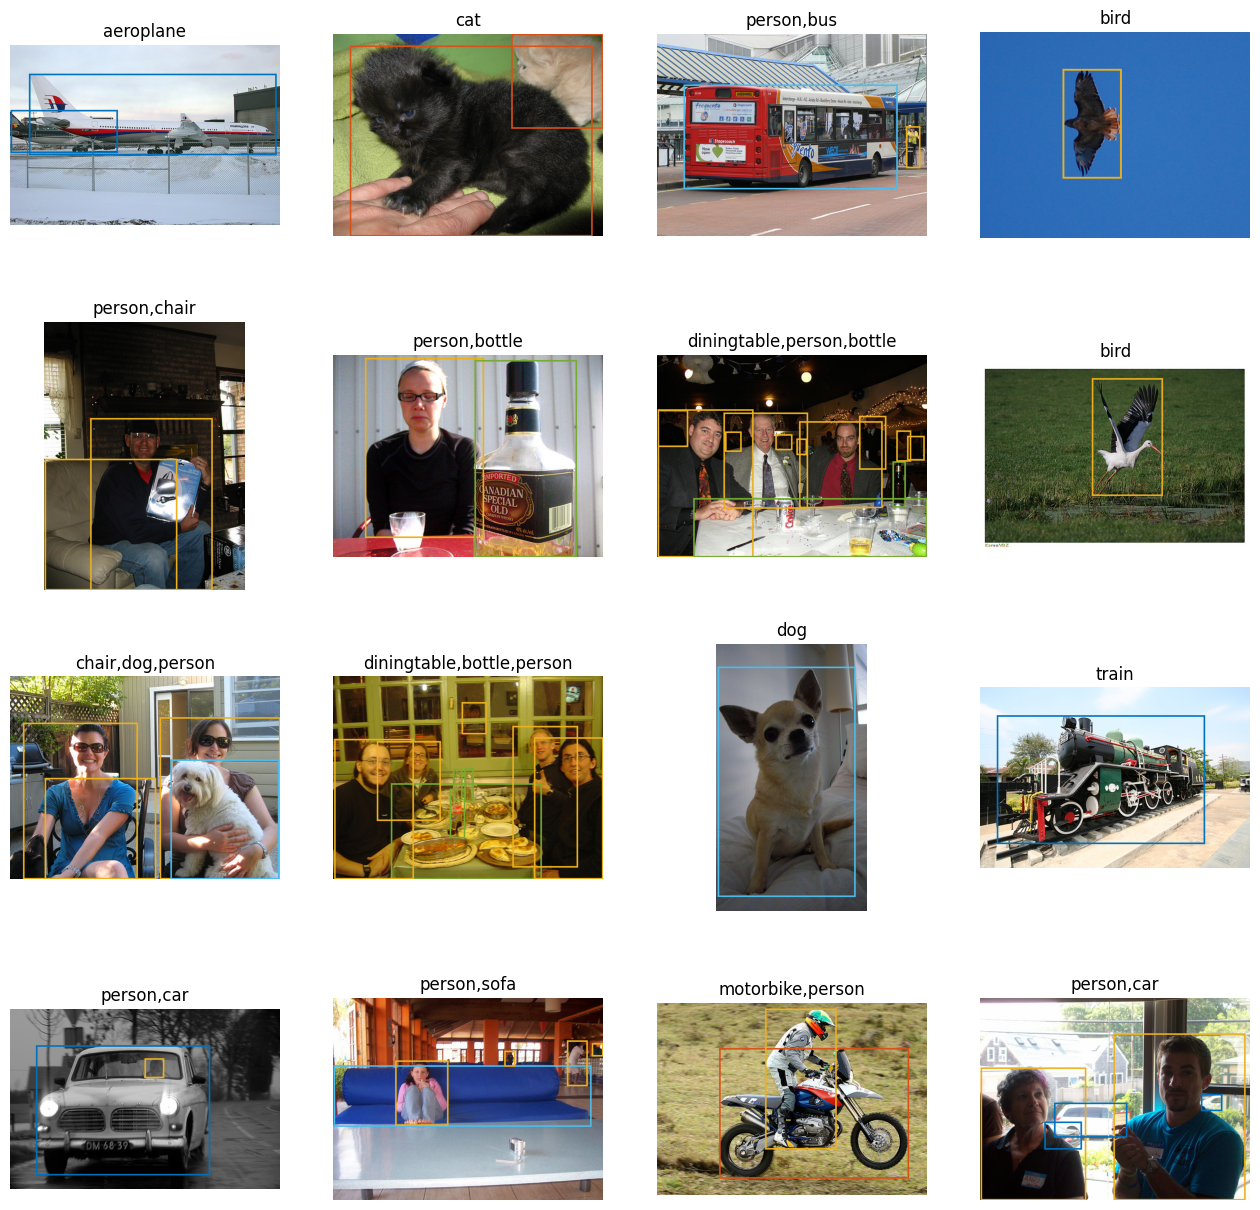

In [5]:
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

COLORS = [
    (0, 113, 188),
    (216, 82, 24),
    (236, 176, 31),
    (125, 46, 141),
    (118, 171, 47),
    (76, 189, 237),
]
COLORS *= 4


def draw_image_from_idx(dataset, idx):
    image, annotations = dataset[idx]
    draw = ImageDraw.Draw(image)
    objects = annotations["annotation"]["object"]
    texts = set()

    for i in range(len(objects)):
        box = objects[i]["bndbox"]
        class_name = objects[i]["name"]
        x1, y1, x2, y2 = (
            int(box["xmin"]),
            int(box["ymin"]),
            int(box["xmax"]),
            int(box["ymax"]),
        )
        color = COLORS[dataset.label2id[class_name]]
        draw.rectangle((x1, y1, x2, y2), outline=color, width=3)
        texts.add(class_name)
    return image, texts


def show_samples(ds, rows, cols):
    sample_indices = torch.randint(0, len(ds), (rows * cols,)).tolist()
    fig = plt.figure(figsize=(cols * 4, rows * 4))
    # plotting
    for i, idx in enumerate(sample_indices):
        image, texts = draw_image_from_idx(ds, idx)
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(",".join(texts))
        plt.axis("off")


show_samples(voc_datasets, rows=4, cols=4)